In [1]:
import lasio
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
las = lasio.read("1045041709.las")
df = las.df()

In [3]:
las.keys()

['DEPT',
 'BVTX',
 'AVTX',
 'RXORT',
 'CILD',
 'RLL3',
 'SP',
 'RILD',
 'RILM',
 'DCAL',
 'RHOB',
 'RHOC',
 'DPOR',
 'CNLS',
 'CNSS',
 'CNDL',
 'GR',
 'DGA',
 'MCAL',
 'MI',
 'MN',
 'DT',
 'ITT',
 'SPOR']

In [4]:
las.curves

[CurveItem(mnemonic=DEPT, unit=FT, value=0 000 00 00, descr=Depth, original_mnemonic=DEPT, data.shape=(6822,)),
 CurveItem(mnemonic=BVTX, unit=FT3, value=, descr=, original_mnemonic=BVTX, data.shape=(6822,)),
 CurveItem(mnemonic=AVTX, unit=FT3, value=, descr=, original_mnemonic=AVTX, data.shape=(6822,)),
 CurveItem(mnemonic=RXORT, unit=, value=Rxo / Rt, descr=, original_mnemonic=RXORT, data.shape=(6822,)),
 CurveItem(mnemonic=CILD, unit=OHM-M, value=DIL Deep Conductivity, descr=, original_mnemonic=CILD, data.shape=(6822,)),
 CurveItem(mnemonic=RLL3, unit=OHM-M, value=DIL Shallow Resistivity, descr=, original_mnemonic=RLL3, data.shape=(6822,)),
 CurveItem(mnemonic=SP, unit=MV, value=DIL Spontaneous Potential, descr=, original_mnemonic=SP, data.shape=(6822,)),
 CurveItem(mnemonic=RILD, unit=OHM-M, value=DIL Deep Resistivity, descr=, original_mnemonic=RILD, data.shape=(6822,)),
 CurveItem(mnemonic=RILM, unit=OHM-M, value=DIL Medium Resistivity, descr=, original_mnemonic=RILM, data.shape=(

In [5]:
las.version

[HeaderItem(mnemonic=VERS, unit=, value=2.0, descr=CWLS Log ASCII Standard - ...),
 HeaderItem(mnemonic=WRAP, unit=, value=NO, descr=One line per depth step)]

In [6]:
las.well

[HeaderItem(mnemonic=STRT, unit=FT, value=245.0, descr=START DEPTH),
 HeaderItem(mnemonic=STOP, unit=FT, value=3655.5, descr=STOP DEPTH),
 HeaderItem(mnemonic=STEP, unit=FT, value=0.5, descr=STEP),
 HeaderItem(mnemonic=NULL, unit=, value=-999.25, descr=NULL VALUE),
 HeaderItem(mnemonic=COMP, unit=, value=Vamco Operations, descr=COMPANY),
 HeaderItem(mnemonic=WELL, unit=, value=MGT A-1 #1, descr=WELL),
 HeaderItem(mnemonic=FLD, unit=, value=Dell East, descr=FIELD),
 HeaderItem(mnemonic=LOC, unit=, value=1590' FNL & 770' FEL, descr=LOCATION),
 HeaderItem(mnemonic=CNTY, unit=, value=Stafford, descr=COUNTY),
 HeaderItem(mnemonic=SRVC, unit=, value=, descr=SERVICE COMPANY),
 HeaderItem(mnemonic=DATE, unit=, value=Wed Aug 28 17-36-49 2013, descr=LOG DATE),
 HeaderItem(mnemonic=UWI, unit=, value=, descr=UNIQUE WELL ID),
 HeaderItem(mnemonic=STAT, unit=, value=Kansas, descr=STATE),
 HeaderItem(mnemonic=SECT, unit=, value=8, descr=SECTION),
 HeaderItem(mnemonic=TOWN, unit=, value=21S, descr=TOW

In [7]:
las.params

[]

In [8]:
las.data

array([[2.45000e+02, 0.00000e+00, 0.00000e+00, ..., 5.05505e+01,
        0.00000e+00, 2.08670e+00],
       [2.45500e+02, 0.00000e+00, 0.00000e+00, ..., 5.20939e+01,
        0.00000e+00, 3.17810e+00],
       [2.46000e+02, 0.00000e+00, 0.00000e+00, ..., 5.30570e+01,
        0.00000e+00, 3.85930e+00],
       ...,
       [3.65450e+03, 0.00000e+00, 0.00000e+00, ...,         nan,
                nan,         nan],
       [3.65500e+03, 0.00000e+00, 0.00000e+00, ...,         nan,
                nan,         nan],
       [3.65550e+03, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [9]:
df.head(10)

BVTX  AVTX     RXORT     CILD    RLL3       SP     RILD         RILM  \
DEPT                                                                          
245.0   0.0   0.0  179.4906  36.2453  0.2789 -58.1230  27.5898  100000.0000   
245.5   0.0   0.0  178.4596  37.2667  0.2787 -54.0898  26.8336  100000.0000   
246.0   0.0   0.0  176.3283  39.4197  0.2795 -51.0096  25.3680  100000.0000   
246.5   0.0   0.0  173.4335  42.5668  0.2790 -48.8708  23.4925  100000.0000   
247.0   0.0   0.0  170.4642  46.1044  0.2770 -47.4772  21.6899  100000.0000   
247.5   0.0   0.0  167.8864  49.4181  0.2744 -46.5672  20.2355  100000.0000   
248.0   0.0   0.0  165.6853  52.3360  0.2736 -45.9178  19.1073  100000.0000   
248.5   0.0   0.0  163.8102  54.7979  0.2754 -45.3891  18.2489   85510.6719   
249.0   0.0   0.0  162.3092  56.7226  0.2778 -44.9290  17.6297  100000.0000   
249.5   0.0   0.0  161.1121  58.2564  0.2788 -44.5601  17.1655  100000.0000   

         DCAL    RHOB   ...       CNSS     CNDL       GR  DGA  MCAL  MI  MN  \
DEPT                    ...                                                   
245.0  2.4842  2.0220   ...    35.6600  25.8758  35.1760  NaN   NaN NaN NaN   
245.5  2.4834  2.0001   ...    37.4964  27.9942  37.0732  NaN   NaN NaN NaN   
246.0  2.4832  1.9746   ...    38.6569  30.2196  40.1031  NaN   NaN NaN NaN   
246.5  2.4843  1.9521   ...    39.7510  32.2619  40.7598  NaN   NaN NaN NaN   
247.0  2.4847  1.9358   ...    40.6200  34.4157  38.5278  NaN   NaN NaN NaN   
247.5  2.4844  1.9234   ...    40.5736  34.2951  37.3568  NaN   NaN NaN NaN   
248.0  2.4839  1.9102   ...    39.3614  31.5512  37.4631  NaN   NaN NaN NaN   
248.5  2.4838  1.8935   ...    37.2060  27.5507  34.5893  NaN   NaN NaN NaN   
249.0  2.4838  1.8742   ...    34.4164  23.8997  33.4205  NaN   NaN NaN NaN   
249.5  2.4844  1.8546   ...    31.7043  20.5250  35.5880  NaN   NaN NaN NaN   

            DT  ITT    SPOR  
DEPT                         
245.0  50.5505  0.0  2.0867  
245.5  52.0939  0.0  3.1781  
246.0  53.0570  0.0  3.8593  
246.5  53.3566  0.0  4.0711  
247.0  53.4949  0.0  4.1690  
247.5  53.9078  0.0  4.4610  
248.0  54.4259  0.0  4.8274  
248.5  54.6186  0.0  4.9637  
249.0  54.4330  0.0  4.8324  
249.5  54.2328  0.0  4.6908  

[10 rows x 23 columns]

In [10]:
df.tail(10)

BVTX  AVTX  RXORT    CILD  RLL3        SP         RILD         RILM  \
DEPT                                                                          
3651.0   0.0   0.0    0.0  0.0000   NaN -151.4341  100000.0000      12.1650   
3651.5   0.0   0.0    0.0  0.1295   NaN -151.2645    7723.9238      19.9916   
3652.0   0.0   0.0    0.0  0.0000   NaN -151.1749  100000.0000      64.8816   
3652.5   0.0   0.0    0.0  0.0000   NaN -150.8269  100000.0000  100000.0000   
3653.0   0.0   0.0    0.0  0.0000   NaN -149.4675  100000.0000  100000.0000   
3653.5   0.0   0.0    0.0  0.0000   NaN -145.5305  100000.0000  100000.0000   
3654.0   0.0   0.0    0.0  0.0000   NaN -136.2791  100000.0000  100000.0000   
3654.5   0.0   0.0    0.0  0.0000   NaN -118.0117  100000.0000  100000.0000   
3655.0   0.0   0.0    0.0  0.0000   NaN  -87.3693  100000.0000  100000.0000   
3655.5   0.0   0.0    0.0  0.0000   0.0    0.0000       0.0000       0.0000   

        DCAL  RHOB  ...   CNSS  CNDL   GR  DGA  MCAL   MI   MN   DT  ITT  SPOR  
DEPT                ...                                                         
3651.0   NaN   NaN  ...    NaN   NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN   NaN  
3651.5   NaN   NaN  ...    NaN   NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN   NaN  
3652.0   NaN   NaN  ...    NaN   NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN   NaN  
3652.5   NaN   NaN  ...    NaN   NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN   NaN  
3653.0   NaN   NaN  ...    NaN   NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN   NaN  
3653.5   NaN   NaN  ...    NaN   NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN   NaN  
3654.0   NaN   NaN  ...    NaN   NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN   NaN  
3654.5   NaN   NaN  ...    NaN   NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN   NaN  
3655.0   NaN   NaN  ...    NaN   NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN   NaN  
3655.5   0.0   0.0  ...    0.0   0.0  0.0  NaN   0.0  0.0  0.0  0.0  0.0   0.0  

[10 rows x 23 columns]

In [11]:
df.describe()

BVTX         AVTX        RXORT         CILD         RLL3  \
count  6822.000000  6822.000000  6822.000000  6822.000000  6796.000000   
mean      0.024186     0.015098    -9.197678   267.943516    17.723767   
std       0.167341     0.132330    61.269076   203.532558    34.160101   
min       0.000000     0.000000  -142.840100     0.000000     0.000000   
25%       0.000000     0.000000   -28.426150   107.607200     3.812850   
50%       0.000000     0.000000   -15.901450   241.440350     6.660550   
75%       0.000000     0.000000    -7.664325   388.243500    16.151525   
max       2.000000     2.000000   499.612900  1540.117300   359.428900   

                SP           RILD           RILM         DCAL         RHOB  \
count  6822.000000    6822.000000    6822.000000  6786.000000  6790.000000   
mean   -152.538916    2918.704640     388.653932     8.876664     2.375491   
std      39.743166   16786.381004    6129.747346     1.512950     0.304393   
min    -247.366400       0.000000       0.000000     0.000000     0.000000   
25%    -178.316875       2.575450       2.596650     7.996225     2.303750   
50%    -161.109150       4.140600       3.577050     8.225900     2.453350   
75%    -137.825675       9.284275       6.673350     9.090000     2.569500   
max       0.000000  100000.000000  100000.000000    13.749300     4.030400   

          ...              CNSS         CNDL           GR          DGA  \
count     ...       6772.000000  6772.000000  6763.000000  1248.000000   
mean      ...         25.766557    15.401907    63.213319     2.774201   
std       ...         10.016963    10.441468    29.011093     0.113453   
min       ...          0.000000    -0.318100     0.000000     0.000000   
25%       ...         16.317500     5.096450    39.373600     2.720175   
50%       ...         27.609950    15.566850    62.089600     2.739300   
75%       ...         33.936325    23.417150    81.768800     2.865550   
max       ...         57.882400    64.333100   333.377400     2.950700   

              MCAL           MI           MN           DT          ITT  \
count  1277.000000  1277.000000  1277.000000  6809.000000  6809.000000   
mean      8.018523    21.027493    20.085202    83.374199     0.069614   
std       0.708742    19.512103    18.178182    19.960400     0.277168   
min       0.000000     0.000000    -0.696500    -2.489500     0.000000   
25%       7.872100     6.053500     4.624800    67.756100     0.000000   
50%       7.939700    13.505300    14.305000    80.491900     0.000000   
75%       8.008000    33.275800    31.705400   101.671700     0.000000   
max      21.356500   139.568500   122.418800   149.230100     2.000000   

              SPOR  
count  6809.000000  
mean     25.304944  
std      14.101499  
min     -35.424000  
25%      14.254700  
50%      23.261600  
75%      38.240300  
max      71.874200  

[8 rows x 23 columns]

In [12]:
df['RILM'][df['RILM'] == 100000] = np.nan
df['RILD'][df['RILD'] == 100000] = np.nan

In [13]:
df.describe()['RILM']

count     6797.000000
mean        22.274110
std       1037.695264
min          0.000000
25%          2.591200
50%          3.558600
75%          6.634500
max      85510.671900
Name: RILM, dtype: float64

In [14]:
df.describe()['RILD']

count    6624.000000
mean       16.818094
std       151.821369
min         0.000000
25%         2.548875
50%         4.012950
75%         8.124475
max      7723.923800
Name: RILD, dtype: float64

In [15]:
df['RILM_avg'] = df['RILM'].rolling(int(1 / las.well.STEP.value), center=True).mean()
df['RILD_avg'] = df['RILD'].rolling(int(1 / las.well.STEP.value), center=True).mean()
las.set_data(df)

In [16]:
las.curves

[CurveItem(mnemonic=DEPT, unit=FT, value=0 000 00 00, descr=Depth, original_mnemonic=DEPT, data.shape=(6822,)),
 CurveItem(mnemonic=BVTX, unit=FT3, value=, descr=, original_mnemonic=BVTX, data.shape=(6822,)),
 CurveItem(mnemonic=AVTX, unit=FT3, value=, descr=, original_mnemonic=AVTX, data.shape=(6822,)),
 CurveItem(mnemonic=RXORT, unit=, value=Rxo / Rt, descr=, original_mnemonic=RXORT, data.shape=(6822,)),
 CurveItem(mnemonic=CILD, unit=OHM-M, value=DIL Deep Conductivity, descr=, original_mnemonic=CILD, data.shape=(6822,)),
 CurveItem(mnemonic=RLL3, unit=OHM-M, value=DIL Shallow Resistivity, descr=, original_mnemonic=RLL3, data.shape=(6822,)),
 CurveItem(mnemonic=SP, unit=MV, value=DIL Spontaneous Potential, descr=, original_mnemonic=SP, data.shape=(6822,)),
 CurveItem(mnemonic=RILD, unit=OHM-M, value=DIL Deep Resistivity, descr=, original_mnemonic=RILD, data.shape=(6822,)),
 CurveItem(mnemonic=RILM, unit=OHM-M, value=DIL Medium Resistivity, descr=, original_mnemonic=RILM, data.shape=(

In [17]:
las.df().describe()

BVTX         AVTX        RXORT         CILD         RLL3  \
count  6822.000000  6822.000000  6822.000000  6822.000000  6796.000000   
mean      0.024186     0.015098    -9.197678   267.943516    17.723767   
std       0.167341     0.132330    61.269076   203.532558    34.160101   
min       0.000000     0.000000  -142.840100     0.000000     0.000000   
25%       0.000000     0.000000   -28.426150   107.607200     3.812850   
50%       0.000000     0.000000   -15.901450   241.440350     6.660550   
75%       0.000000     0.000000    -7.664325   388.243500    16.151525   
max       2.000000     2.000000   499.612900  1540.117300   359.428900   

                SP         RILD          RILM         DCAL         RHOB  \
count  6822.000000  6624.000000   6797.000000  6786.000000  6790.000000   
mean   -152.538916    16.818094     22.274110     8.876664     2.375491   
std      39.743166   151.821369   1037.695264     1.512950     0.304393   
min    -247.366400     0.000000      0.000000     0.000000     0.000000   
25%    -178.316875     2.548875      2.591200     7.996225     2.303750   
50%    -161.109150     4.012950      3.558600     8.225900     2.453350   
75%    -137.825675     8.124475      6.634500     9.090000     2.569500   
max       0.000000  7723.923800  85510.671900    13.749300     4.030400   

          ...                GR          DGA         MCAL           MI  \
count     ...       6763.000000  1248.000000  1277.000000  1277.000000   
mean      ...         63.213319     2.774201     8.018523    21.027493   
std       ...         29.011093     0.113453     0.708742    19.512103   
min       ...          0.000000     0.000000     0.000000     0.000000   
25%       ...         39.373600     2.720175     7.872100     6.053500   
50%       ...         62.089600     2.739300     7.939700    13.505300   
75%       ...         81.768800     2.865550     8.008000    33.275800   
max       ...        333.377400     2.950700    21.356500   139.568500   

                MN           DT          ITT         SPOR     RILM_avg  \
count  1277.000000  6809.000000  6809.000000  6809.000000  6791.000000   
mean     20.085202    83.374199     0.069614    25.304944     9.316913   
std      18.178182    19.960400     0.277168    14.101499    25.928000   
min      -0.696500    -2.489500     0.000000   -35.424000     0.740250   
25%       4.624800    67.756100     0.000000    14.254700     2.592425   
50%      14.305000    80.491900     0.000000    23.261600     3.574500   
75%      31.705400   101.671700     0.000000    38.240300     6.592900   
max     122.418800   149.230100     2.000000    71.874200  1068.171500   

          RILD_avg  
count  6593.000000  
mean     13.498349  
std      75.795771  
min       0.649850  
25%       2.549300  
50%       4.020650  
75%       7.967850  
max    3171.704400  

[8 rows x 25 columns]

In [18]:
df.isnull().sum().sort_values(ascending=False)

DGA         5574
MN          5545
MI          5545
MCAL        5545
RILD_avg     229
RILD         198
GR            59
CNSS          50
CNDL          50
CNLS          50
DCAL          36
DPOR          32
RHOC          32
RHOB          32
RILM_avg      31
RLL3          26
RILM          25
DT            13
ITT           13
SPOR          13
SP             0
CILD           0
RXORT          0
AVTX           0
BVTX           0
dtype: int64

In [19]:
df1 = df.drop(["DGA", "MN", "MI", "MCAL", "RILD_avg", "RILM_avg"], axis = 1)

In [20]:
df1.isnull().sum().sort_values(ascending=False)

RILD     198
GR        59
CNDL      50
CNSS      50
CNLS      50
DCAL      36
RHOB      32
DPOR      32
RHOC      32
RLL3      26
RILM      25
SPOR      13
ITT       13
DT        13
SP         0
CILD       0
RXORT      0
AVTX       0
BVTX       0
dtype: int64

In [21]:
for col in df1.columns:
    df1[col] = df1[col].fillna(df1[col].mean())

In [22]:
k = 25

In [23]:
km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=1000, random_state=0)

In [24]:
km.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=1000,
    n_clusters=25, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [25]:
array = pd.DataFrame(km.labels_)

In [26]:
y_predict = km.fit_predict(df1)

In [27]:
y_predict

array([18, 18, 18, ..., 14, 14, 14])

In [28]:
km.labels_

array([18, 18, 18, ..., 14, 14, 14])

In [29]:
df1.head()

BVTX  AVTX     RXORT     CILD    RLL3       SP     RILD      RILM  \
DEPT                                                                       
245.0   0.0   0.0  179.4906  36.2453  0.2789 -58.1230  27.5898  22.27411   
245.5   0.0   0.0  178.4596  37.2667  0.2787 -54.0898  26.8336  22.27411   
246.0   0.0   0.0  176.3283  39.4197  0.2795 -51.0096  25.3680  22.27411   
246.5   0.0   0.0  173.4335  42.5668  0.2790 -48.8708  23.4925  22.27411   
247.0   0.0   0.0  170.4642  46.1044  0.2770 -47.4772  21.6899  22.27411   

         DCAL    RHOB    RHOC     DPOR     CNLS     CNSS     CNDL       GR  \
DEPT                                                                         
245.0  2.4842  2.0220  0.0925  40.2358  33.0546  35.6600  25.8758  35.1760   
245.5  2.4834  2.0001  0.0870  41.5172  34.9959  37.4964  27.9942  37.0732   
246.0  2.4832  1.9746  0.0803  43.0046  36.4578  38.6569  30.2196  40.1031   
246.5  2.4843  1.9521  0.0747  44.3226  38.0462  39.7510  32.2619  40.7598   
247.0  2.4847  1.9358  0.0719  45.2765  39.4033  40.6200  34.4157  38.5278   

            DT  ITT    SPOR  
DEPT                         
245.0  50.5505  0.0  2.0867  
245.5  52.0939  0.0  3.1781  
246.0  53.0570  0.0  3.8593  
246.5  53.3566  0.0  4.0711  
247.0  53.4949  0.0  4.1690

In [30]:
df1

BVTX  AVTX     RXORT     CILD       RLL3        SP         RILD  \
DEPT                                                                      
245.0    0.0   0.0  179.4906  36.2453   0.278900  -58.1230    27.589800   
245.5    0.0   0.0  178.4596  37.2667   0.278700  -54.0898    26.833600   
246.0    0.0   0.0  176.3283  39.4197   0.279500  -51.0096    25.368000   
246.5    0.0   0.0  173.4335  42.5668   0.279000  -48.8708    23.492500   
247.0    0.0   0.0  170.4642  46.1044   0.277000  -47.4772    21.689900   
247.5    0.0   0.0  167.8864  49.4181   0.274400  -46.5672    20.235500   
248.0    0.0   0.0  165.6853  52.3360   0.273600  -45.9178    19.107300   
248.5    0.0   0.0  163.8102  54.7979   0.275400  -45.3891    18.248900   
249.0    0.0   0.0  162.3092  56.7226   0.277800  -44.9290    17.629700   
249.5    0.0   0.0  161.1121  58.2564   0.278800  -44.5601    17.165500   
250.0    0.0   0.0  160.1417  59.5534   0.279500  -44.3455    16.791600   
250.5    0.0   0.0  159.4701  60.5161   0.280300  -44.3349    16.524500   
251.0    0.0   0.0  159.1381  61.0684   0.280000  -44.5186    16.375100   
251.5    0.0   0.0  159.0013  61.3968   0.278700  -44.8175    16.287500   
252.0    0.0   0.0  158.8792  61.7296   0.277600  -45.1183    16.199700   
252.5    0.0   0.0  158.7058  62.1302   0.277500  -45.3254    16.095200   
253.0    0.0   0.0  158.4376  62.6561   0.277000  -45.3941    15.960100   
253.5    0.0   0.0  157.9878  63.4513   0.276400  -45.3312    15.760100   
254.0    0.0   0.0  157.4151  64.4378   0.276500  -45.1701    15.518800   
254.5    0.0   0.0  156.9969  65.1862   0.276800  -44.9470    15.340700   
255.0    0.0   0.0  156.8420  65.5285   0.276400  -44.6909    15.260500   
255.5    0.0   0.0  156.5365  66.1444   0.275200  -44.4298    15.118400   
256.0    0.0   0.0  155.4215  68.1365   0.274700  -44.1936    14.676400   
256.5    0.0   0.0  153.6053  71.3867   0.274800  -44.0002    14.008200   
257.0    0.0   0.0  152.2694  73.7874   0.275100  -43.8333    13.552400   
257.5    0.0   0.0  152.0094  74.1180   0.275700  -43.6404    13.492000   
258.0    0.0   0.0  152.0592  73.8219   0.277000  -43.3690    13.546100   
258.5    0.0   0.0  151.9575  73.8369   0.278100  -43.0177    13.543400   
259.0    0.0   0.0  153.3216  71.2192   0.278700  -42.6671    14.041100   
259.5    0.0   0.0  160.0025  60.0555   0.278300  -42.4661    16.651300   
...      ...   ...       ...      ...        ...       ...          ...   
3641.0   0.0   0.0    0.1068  70.6385   6.519500 -156.8471    14.156600   
3641.5   0.0   0.0   29.0586  71.1877   0.368800 -156.1014    14.047400   
3642.0   0.0   0.0   67.3505  73.4752   0.010000 -155.6350    13.610000   
3642.5   0.0   0.0  116.7931  75.5651  17.723767 -155.5480    13.233600   
3643.0   0.0   0.0  178.4810  76.4487  17.723767 -155.8911    13.080700   
3643.5   0.0   0.0  253.3464  76.5429  17.723767 -156.6329    13.064600   
3644.0   0.0   0.0  351.7510  76.3160  17.723767 -157.6598    13.103400   
3644.5   0.0   0.0    0.0000  73.4460  17.723767 -158.8055    13.615500   
3645.0   0.0   0.0    0.0000  69.7747  17.723767 -159.8780    14.331800   
3645.5   0.0   0.0    0.0000  67.6416  17.723767 -160.6751    14.783800   
3646.0   0.0   0.0    0.0000  65.8365  17.723767 -161.0180    15.189100   
3646.5   0.0   0.0    0.0000  64.8991  17.723767 -160.8106    15.408500   
3647.0   0.0   0.0    0.0000  63.3845  17.723767 -160.0818    15.776700   
3647.5   0.0   0.0    0.0000  56.1238  17.723767 -158.9650    17.817800   
3648.0   0.0   0.0    0.0000  35.2233  17.723767 -157.6261    28.390300   
3648.5   0.0   0.0    0.0000   5.8271  17.723767 -156.2074   171.613400   
3649.0   0.0   0.0    0.0000   0.0000  17.723767 -154.8212    16.818094   
3649.5   0.0   0.0    0.0000   0.0000  17.723767 -153.5708    16.818094   
3650.0   0.0   0.0    0.0000   0.0000  17.723767 -152.5537    16.818094   
3650.5   0.0   0.0    0.0000   0.0000  17.723767 -151.8378    16.818094   
3651.0   0.0   0.0    0.0000   0.

In [31]:
df["DGA"].head()

DEPT
245.0   NaN
245.5   NaN
246.0   NaN
246.5   NaN
247.0   NaN
Name: DGA, dtype: float64

<Figure size 1080x864 with 0 Axes>

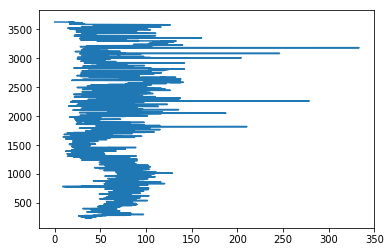

<Figure size 1080x864 with 0 Axes>

In [32]:
plt.plot(las["GR"], las["DEPT"])
# plt.plot(las[""])
plt.figure(figsize=(15,12))

In [33]:
df1.head()

BVTX  AVTX     RXORT     CILD    RLL3       SP     RILD      RILM  \
DEPT                                                                       
245.0   0.0   0.0  179.4906  36.2453  0.2789 -58.1230  27.5898  22.27411   
245.5   0.0   0.0  178.4596  37.2667  0.2787 -54.0898  26.8336  22.27411   
246.0   0.0   0.0  176.3283  39.4197  0.2795 -51.0096  25.3680  22.27411   
246.5   0.0   0.0  173.4335  42.5668  0.2790 -48.8708  23.4925  22.27411   
247.0   0.0   0.0  170.4642  46.1044  0.2770 -47.4772  21.6899  22.27411   

         DCAL    RHOB    RHOC     DPOR     CNLS     CNSS     CNDL       GR  \
DEPT                                                                         
245.0  2.4842  2.0220  0.0925  40.2358  33.0546  35.6600  25.8758  35.1760   
245.5  2.4834  2.0001  0.0870  41.5172  34.9959  37.4964  27.9942  37.0732   
246.0  2.4832  1.9746  0.0803  43.0046  36.4578  38.6569  30.2196  40.1031   
246.5  2.4843  1.9521  0.0747  44.3226  38.0462  39.7510  32.2619  40.7598   
247.0  2.4847  1.9358  0.0719  45.2765  39.4033  40.6200  34.4157  38.5278   

            DT  ITT    SPOR  
DEPT                         
245.0  50.5505  0.0  2.0867  
245.5  52.0939  0.0  3.1781  
246.0  53.0570  0.0  3.8593  
246.5  53.3566  0.0  4.0711  
247.0  53.4949  0.0  4.1690

In [34]:
gr = df1.GR


In [35]:
label = km.labels_

In [75]:
grlabel= pd.DataFrame({'gr': gr,
                       'label': label
    
})

In [76]:
grlabel

gr  label
DEPT                    
245.0   35.176000     18
245.5   37.073200     18
246.0   40.103100     18
246.5   40.759800     18
247.0   38.527800     18
247.5   37.356800     18
248.0   37.463100     18
248.5   34.589300      2
249.0   33.420500     18
249.5   35.588000     18
250.0   35.213600     18
250.5   33.996200     18
251.0   33.932500     18
251.5   34.662700      6
252.0   36.589300     18
252.5   37.845900     18
253.0   36.414900     18
253.5   33.804600     18
254.0   32.918500     18
254.5   34.407300     18
255.0   36.564500     18
255.5   39.866800     18
256.0   43.925200     18
256.5   44.752000     18
257.0   41.014800     18
257.5   38.364800     18
258.0   38.094600     18
258.5   37.984400     18
259.0   41.044500     18
259.5   44.050000     18
...           ...    ...
3641.0  63.213319     17
3641.5  63.213319     17
3642.0  63.213319     17
3642.5  63.213319     17
3643.0  63.213319     18
3643.5  63.213319      4
3644.0  63.213319      4
3644.5  63.213319     17
3645.0  63.213319     17
3645.5  63.213319      5
3646.0  63.213319      5
3646.5  63.213319      5
3647.0  63.213319      5
3647.5  63.213319     17
3648.0  63.213319     17
3648.5  63.213319     14
3649.0  63.213319     17
3649.5  63.213319     17
3650.0  63.213319     17
3650.5  63.213319     17
3651.0  63.213319     17
3651.5  63.213319     21
3652.0  63.213319     17
3652.5  63.213319     17
3653.0  63.213319     17
3653.5  63.213319     17
3654.0  63.213319     17
3654.5  63.213319     14
3655.0  63.213319     14
3655.5   0.000000     14

[6822 rows x 2 columns]

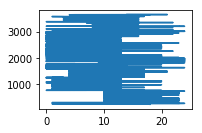

In [77]:
plt.figure(1)
plt.subplot(211)
plt.plot(grlabel.gr, grlabel.index)
plt.subplot(221)
plt.plot(grlabel.label, grlabel.index)

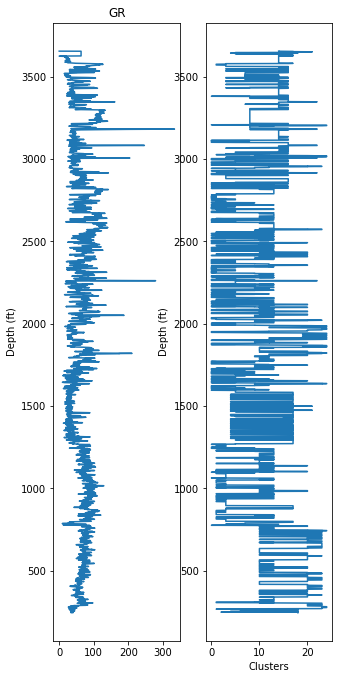

In [78]:
plt.figure(num=None, figsize=(5, 25))

colors = ['blue','green','red','purple']

plt.subplot(2, 2, 1)
plt.plot(grlabel.gr, grlabel.index)
plt.title('GR')
plt.ylabel('Depth (ft)')

plt.subplot(2, 2, 2)
plt.plot(grlabel.label, grlabel.index)
# plt.scatter(grlabel.label, grlabel.index, c=label, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Clusters')
plt.ylabel('Depth (ft)')




plt.show()

SHALE

In [79]:
# counter = 0
counting = grlabel.iloc[1510:1911, :]

In [80]:
counting

gr  label
DEPT                   
1000.0   88.9216     13
1000.5   80.1485     13
1001.0   69.3706      9
1001.5   68.7016      1
1002.0   78.0711      1
1002.5   85.4901      1
1003.0   86.9157      1
1003.5   88.3050      3
1004.0   89.9361      3
1004.5   91.0877      3
1005.0   91.9234      3
1005.5   94.4707      3
1006.0   99.2492      1
1006.5  103.6530      1
1007.0  108.1712      1
1007.5  109.6041      1
1008.0  109.2338      1
1008.5  108.8399      1
1009.0  104.4932      1
1009.5   96.6471      1
1010.0   91.2179     13
1010.5   92.7282     13
1011.0   96.5797     13
1011.5   97.9193     13
1012.0   99.0819     13
1012.5   98.8519     13
1013.0   92.3514     13
1013.5   80.0509     13
1014.0   74.7819     13
1014.5   83.0607     13
...          ...    ...
1185.5   68.1108      1
1186.0   73.7647      1
1186.5   83.1133      1
1187.0   87.8323      1
1187.5   79.4395     13
1188.0   66.5092     13
1188.5   62.0594     13
1189.0   66.2205     13
1189.5   69.9162     13
1190.0   71.3171     13
1190.5   72.6621     13
1191.0   73.2250     13
1191.5   75.8712     13
1192.0   79.4865     13
1192.5   78.7284     13
1193.0   75.5822     13
1193.5   76.7666     13
1194.0   80.6236     13
1194.5   83.2056     13
1195.0   81.7204     10
1195.5   76.9298     10
1196.0   76.3839     10
1196.5   81.8394     10
1197.0   86.9017     10
1197.5   86.1638     10
1198.0   82.6381     10
1198.5   80.5132     10
1199.0   76.4196     10
1199.5   69.2282     10
1200.0   65.0591     10

[401 rows x 2 columns]

In [81]:
counting["label"].value_counts()

13    109
10    104
3      86
1      82
9      13
20      4
0       3
Name: label, dtype: int64

In [43]:
grlabel.iloc[4511:4611, :]

gr  dolomite  label
DEPT                             
2500.5   91.3070   20.8886      1
2501.0   93.2774   22.1500      1
2501.5   88.9311   23.2441      1
2502.0   79.4468   22.9067      1
2502.5   69.4855   20.2784      1
2503.0   66.4229   15.9190      1
2503.5   67.8632   12.6360      0
2504.0   66.6190   10.7909      3
2504.5   63.1458   10.5308      3
2505.0   60.8786   11.8771      0
2505.5   63.1319   14.6825      0
2506.0   73.6686   18.8208      1
2506.5   88.7080   21.4238      1
2507.0   98.0115   21.7994     13
2507.5   99.8883   20.0776     13
2508.0   98.6092   16.4557     13
2508.5   91.8017   13.3707     13
2509.0   83.7269   12.4099     10
2509.5   78.4111   14.0813     10
2510.0   71.2983   18.2668     10
2510.5   63.6809   21.4120     10
2511.0   58.1144   21.4579     10
2511.5   55.0724   19.1815     10
2512.0   55.6326   16.1660     12
2512.5   55.9583   14.1142     13
2513.0   54.3277   13.2099     13
2513.5   58.0517   13.3350     13
2514.0   67.0086   14.9479     13
2514.5   74.3388   18.3829     13
2515.0   81.1700   20.3829     13
...          ...       ...    ...
2535.5   78.2375    4.1112      0
2536.0   94.4136    6.6214      1
2536.5   98.1917   11.3369      1
2537.0   94.3687   14.1077      1
2537.5   91.8248   15.5887      1
2538.0   93.1315   17.1313      1
2538.5   94.9687   19.3158      1
2539.0   99.9148   20.9093      1
2539.5  105.8199   20.6974      1
2540.0  101.7178   18.8720     13
2540.5   90.3268   16.8186     13
2541.0   84.6088   15.0149     13
2541.5   85.5988   13.5175     13
2542.0   87.6458   12.1244     13
2542.5   89.9423   11.5939     13
2543.0   92.4875   11.8296     13
2543.5   89.4912   11.6667     13
2544.0   76.7126   10.4228      9
2544.5   62.6849    8.0187      9
2545.0   58.3178    6.6265      1
2545.5   60.2628    6.2939      0
2546.0   60.4531    6.9050      0
2546.5   58.4031    8.1210      0
2547.0   59.6278    9.1583      0
2547.5   66.0444    9.7836      0
2548.0   71.7378   10.1978      0
2548.5   72.5368   10.7092      0
2549.0   71.1993   11.2883      1
2549.5   71.8781   12.3760      1
2550.0   75.6297   14.1605      1

[100 rows x 3 columns]

In [44]:
grlabel.iloc[4611:4721, :]

gr  dolomite  label
DEPT                             
2550.5   81.6966   17.2417      1
2551.0   90.5566   20.1460      1
2551.5   99.2273   20.8274     13
2552.0  103.8120   19.6524     13
2552.5  102.8164   18.9180     13
2553.0   96.1697   21.2377     13
2553.5   89.3628   26.3898     13
2554.0   85.0986   31.3260     13
2554.5   82.0605   32.6504     13
2555.0   83.7564   30.5307     13
2555.5   88.9393   27.2318     13
2556.0   95.9831   25.8210     13
2556.5  100.4706   24.9098      1
2557.0   91.5218   24.7501      1
2557.5   78.9274   25.6060      1
2558.0   77.7216   26.7227      1
2558.5   83.2214   27.4299     13
2559.0   84.4644   26.6381     13
2559.5   84.5359   24.3363     13
2560.0   91.4900   23.2001     13
2560.5  101.7765   24.0415     13
2561.0  108.8657   27.1064     13
2561.5  109.8741   30.9199     13
2562.0  110.5292   33.6993     13
2562.5  114.2955   36.5567     13
2563.0  116.5583   39.4568     13
2563.5  116.6255   41.0956     13
2564.0  119.0329   39.1885     13
2564.5  122.1615   32.6034     13
2565.0  120.6605   25.2600     13
...          ...       ...    ...
2590.5  121.4041   22.1414     13
2591.0  119.2541   23.9955     13
2591.5  117.5067   26.2621     13
2592.0  119.8407   25.7670     13
2592.5  119.3302   22.6131     13
2593.0  115.8586   19.4533     13
2593.5  117.7801   18.2840     13
2594.0  121.9709   19.6834     13
2594.5  124.5455   22.4350     13
2595.0  125.1610   25.2371     13
2595.5  119.9181   26.8640     13
2596.0  114.0136   27.6183     13
2596.5  115.9240   27.9860     13
2597.0  125.0741   27.7427     13
2597.5  133.1594   26.4638     13
2598.0  134.2277   23.4096     13
2598.5  127.3760   20.2289     13
2599.0  116.1695   18.1744     13
2599.5  109.2995   18.6794     13
2600.0  108.2177   21.6583     13
2600.5  109.3972   26.6210     13
2601.0  118.4244   33.2374     13
2601.5  127.4477   40.7131     13
2602.0  122.7254   44.6362     13
2602.5  111.7283   43.6166     13
2603.0  111.4182   38.0636     13
2603.5  121.6420   31.5043     13
2604.0  127.7329   27.6535     13
2604.5  123.3617   26.6173     13
2605.0  113.8853   25.8701     13

[110 rows x 3 columns]

In [68]:
grlabel.iloc[5231:5310, :]["label"].value_counts()

16    41
3     38
Name: label, dtype: int64

EVAPORITE

In [46]:
grlabel.iloc[2311:2710, :]

gr  dolomite  label
DEPT                            
1400.5  36.2865   40.4243     17
1401.0  27.3052   38.6787      5
1401.5  21.9144   32.6457      5
1402.0  18.7856   27.8646      5
1402.5  20.9589   26.5720     17
1403.0  29.2352   27.9430     17
1403.5  39.5763   31.8842     17
1404.0  48.7961   36.5019     17
1404.5  52.8428   38.4931     17
1405.0  46.5603   35.7118     17
1405.5  33.5551   29.7838     17
1406.0  23.9305   24.6203      4
1406.5  19.9372   21.8699      4
1407.0  19.2183   21.3385      4
1407.5  23.1968   21.8949      4
1408.0  30.6354   22.3224     17
1408.5  35.2166   23.2430     17
1409.0  33.4935   26.3574     17
1409.5  28.8343   31.5646     17
1410.0  25.4679   37.2212      4
1410.5  24.7369   38.7091      4
1411.0  26.4885   35.5203      4
1411.5  25.7144   30.5611     11
1412.0  21.5517   26.1227     17
1412.5  20.3345   21.8312     17
1413.0  22.4998   17.7334     17
1413.5  26.0436   14.1299     17
1414.0  31.5922   12.0925     15
1414.5  36.4631   11.3315     17
1415.0  38.0313   12.2068     17
...         ...       ...    ...
1585.0  34.2352    6.0563      5
1585.5  40.4841    3.8374      5
1586.0  40.3105    2.9808      5
1586.5  34.4096    2.8982      5
1587.0  30.6872    2.8979      5
1587.5  32.3468    2.8621      5
1588.0  34.8490    2.8044      5
1588.5  34.5357    2.4849      5
1589.0  31.7784    2.0284      5
1589.5  25.9553    1.9037      5
1590.0  20.4621    1.8806      5
1590.5  20.4519    1.9041      5
1591.0  26.0944    2.0217      5
1591.5  32.2393    2.4824      5
1592.0  33.0407    2.8284      5
1592.5  31.4825    4.5859      5
1593.0  32.9310    5.4234      5
1593.5  38.7923    4.9550      5
1594.0  45.0932    3.4960      5
1594.5  42.7356    2.8117      5
1595.0  31.5137    2.7466      5
1595.5  24.4840    2.7419      0
1596.0  31.0330    2.8132      0
1596.5  46.4130    4.0627      0
1597.0  56.7629    6.0860      0
1597.5  57.0355    7.9760      9
1598.0  51.6046    7.7167      9
1598.5  45.0052    6.6685      9
1599.0  40.8479    6.0434      9
1599.5  37.2201    5.7540     12

[399 rows x 3 columns]

In [53]:
grlabel.iloc[2311:2710, :]["label"].value_counts()

17    213
4     108
5      34
15     19
7       7
11      6
9       4
0       4
21      2
12      1
6       1
Name: label, dtype: int64

DOLOMITE

In [48]:
grlabel.iloc[2711:2910, :]

gr  dolomite  label
DEPT                            
1600.5  31.7037    4.6681      9
1601.0  32.3176    4.5022      9
1601.5  36.7357    4.9515      9
1602.0  43.5786    5.7180      9
1602.5  48.9806    6.0280      9
1603.0  51.3096    4.9441      9
1603.5  51.2982    2.8187      9
1604.0  49.1523    2.0992      9
1604.5  43.9394    1.8002      0
1605.0  33.5604    1.4529      0
1605.5  20.7199    1.1429      0
1606.0  12.6430    0.9884      7
1606.5  12.0305    0.9267      5
1607.0  16.1752    0.8988      5
1607.5  18.6035    0.9065      5
1608.0  16.2093    0.9829      7
1608.5  14.0899    1.2269      7
1609.0  15.2753    1.6347      7
1609.5  20.2049    1.8955      5
1610.0  30.6611    2.3691      0
1610.5  44.3754    2.5231      0
1611.0  53.9143    2.0225      0
1611.5  50.7993    1.8402      0
1612.0  36.6873    1.6880      0
1612.5  22.9496    1.6005      0
1613.0  16.3507    1.6629      0
1613.5  18.1593    1.8155      0
1614.0  25.9591    1.9688      0
1614.5  32.7429    2.6797      0
1615.0  33.0656    4.0962      0
...         ...       ...    ...
1685.0  10.2578    0.0187      7
1685.5  11.1225    0.0224      7
1686.0  11.9786    0.0424      7
1686.5  13.8014    0.1432      7
1687.0  16.2527    0.4976      7
1687.5  16.6346    0.8877      7
1688.0  14.6415    1.1898      7
1688.5  13.1618    1.5711     14
1689.0  16.3315    1.8300     14
1689.5  26.8474    2.0205      5
1690.0  42.2253    2.6596      5
1690.5  56.1430    2.8704      5
1691.0  60.7392    3.2042      5
1691.5  53.4406    2.9602      5
1692.0  41.5246    2.8236      5
1692.5  34.4562    2.8175      5
1693.0  36.7695    3.1459      5
1693.5  45.8013    5.3002      5
1694.0  54.8237   10.2104      5
1694.5  56.2114   13.4380      5
1695.0  49.9621   13.5179      5
1695.5  45.6783   11.7980      0
1696.0  51.7245   10.5143      0
1696.5  62.2089   10.4948      0
1697.0  63.4558   11.4390      0
1697.5  53.8182   12.4409      0
1698.0  42.2085   12.9349      0
1698.5  39.5934   13.3258      0
1699.0  49.9659   13.9364      9
1699.5  65.1575   14.2345      1

[199 rows x 3 columns]

In [54]:
grlabel.iloc[2711:2910, :]["label"].value_counts()

5     55
0     55
9     30
12    20
7     16
23     6
20     6
24     4
10     3
14     2
13     1
1      1
Name: label, dtype: int64

LIMESTONE

In [50]:
grlabel.iloc[4911:5010, :]

gr  dolomite  label
DEPT                             
2700.5   26.0993    3.0870      5
2701.0   28.1053    4.2711      5
2701.5   31.4416    5.3351      5
2702.0   42.7622    7.2191      0
2702.5   58.6651   10.0477      3
2703.0   67.0669   11.6719      3
2703.5   65.0373   12.6822      0
2704.0   55.7558   13.3543      0
2704.5   44.6665   13.7629      0
2705.0   44.4552   13.5756      0
2705.5   62.9351   12.3137      1
2706.0   86.8354    9.8834      1
2706.5   92.5728    6.5169      1
2707.0   75.9256    4.6141      1
2707.5   54.5095    3.1055      0
2708.0   44.9850    2.8178      0
2708.5   47.5222    2.8089      0
2709.0   55.0712    2.8106      0
2709.5   63.7506    2.8172      0
2710.0   68.0665    2.8170      3
2710.5   66.8526    2.8071      3
2711.0   65.1778    2.7721      3
2711.5   63.2669    2.7260      3
2712.0   58.2183    2.6910      3
2712.5   52.3171    2.6499      3
2713.0   48.4964    2.6433      3
2713.5   46.9208    2.7472      3
2714.0   45.8958    2.8509      5
2714.5   44.5969    4.5782      5
2715.0   45.7629    6.8778      3
...          ...       ...    ...
2735.0   46.9386   14.1662      9
2735.5   50.8515   11.2021      1
2736.0   57.9871    8.3030      0
2736.5   57.3854    6.9298      0
2737.0   49.1917    6.4405      0
2737.5   43.4226    6.3994      0
2738.0   45.8923    7.0582      0
2738.5   51.2993    8.6915      0
2739.0   50.9338   10.7000      3
2739.5   45.0884   11.2664      3
2740.0   43.4570   10.7364      3
2740.5   46.1111    9.3627      3
2741.0   47.3828    9.0265      3
2741.5   51.5822   10.7002      3
2742.0   62.3692   13.1579      3
2742.5   73.3273   16.1187      3
2743.0   79.4945   18.1796      3
2743.5   85.1256   17.7417      1
2744.0   89.8849   16.0582      1
2744.5   90.7551   15.2243      1
2745.0   94.1599   16.0100      1
2745.5   98.9918   17.7183      1
2746.0  101.8788   18.8132      1
2746.5  106.8866   18.4990      1
2747.0  113.1251   17.2827      1
2747.5  116.8091   15.8228      1
2748.0  114.8042   14.4839      1
2748.5  105.4184   13.2588      1
2749.0   94.1459   11.7768      1
2749.5   91.2490   10.1663      1

[99 rows x 3 columns]

In [62]:
grlabel.iloc[5311:5510, :]["label"].value_counts()

16    50
0     46
5     37
9     23
12    15
20     8
3      8
23     3
10     3
22     2
13     2
1      2
Name: label, dtype: int64

Predict

In [52]:
grlabel.iloc[1911:2010, :]["label"].value_counts()

13    49
10    17
1     15
9     13
0      5
Name: label, dtype: int64